# **Linear Regression using Tensorflow**

## **Linear Regression**

Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable.

## **TensorFlow**
TensorFlow is an end-to-end open source platform for machine learning. It has a comprehensive, flexible ecosystem of tools, libraries and community resources that lets researchers push the state-of-the-art in ML and developers easily build and deploy ML powered applications.



In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'

In [6]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4441016595397703068
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 927675415412435883
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 10881415134776886864
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7470045594
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8125509517939967581
physical_device_desc: "device: 0, name: Tesla P4, pci bus id: 0000:00:04.0, compute capability: 6.1"
]


In [5]:
	
!nvidia-smi

Mon Feb 24 05:39:55 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.48.02    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     7W /  75W |      0MiB /  7611MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
learning_rate = 0.01
epochs = 200

In [0]:
n_samples = 30
train_x = np.linspace(0, 20, n_samples)
train_y = 3 * train_x + 4 * np.random.randn(n_samples)

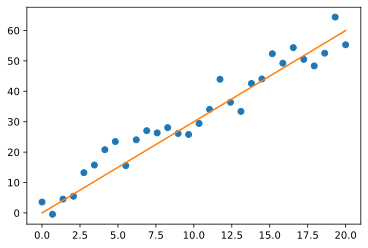

In [9]:
plt.plot(train_x, train_y, 'o')
plt.plot(train_x, 3 * train_x)
plt.show()

In [0]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W = tf.Variable(np.random.randn(), name='weights')
B = tf.Variable(np.random.randn(), name='bias')

In [11]:
pred = X * W + B
# pred = tf.add(tf.multiply(X, W), B)

cost = tf.reduce_sum((pred - Y) ** 2) / (2 * n_samples)

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
init = tf.global_variables_initializer()

epoch: 0000 c=82.4062 w=2.0011 b=0.4627
epoch: 0020 c=9.5866 w=2.9763 b=0.7074
epoch: 0040 c=9.4619 w=2.9664 b=0.8606
epoch: 0060 c=9.3496 w=2.9571 b=1.0059
epoch: 0080 c=9.2483 w=2.9482 b=1.1439
epoch: 0100 c=9.1570 w=2.9397 b=1.2748
epoch: 0120 c=9.0747 w=2.9317 b=1.3991
epoch: 0140 c=9.0005 w=2.9241 b=1.5170
epoch: 0160 c=8.9336 w=2.9169 b=1.6290
epoch: 0180 c=8.8733 w=2.9101 b=1.7352


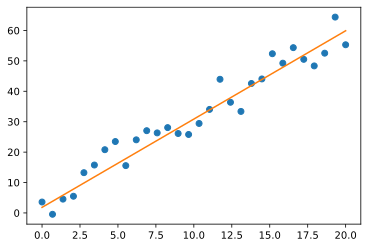

In [13]:
with tf.Session() as sesh:
    sesh.run(init)
    
    for epoch in range(epochs):
        for x, y in zip(train_x, train_y):
            sesh.run(optimizer, feed_dict={X: x, Y: y})
            
        if not epoch % 20:
            c = sesh.run(cost, feed_dict={X: train_x, Y: train_y})
            w = sesh.run(W)
            b = sesh.run(B)
            print(f'epoch: {epoch:04d} c={c:.4f} w={w:.4f} b={b:.4f}')
            
    weight = sesh.run(W)
    bias = sesh.run(B)
    plt.plot(train_x, train_y, 'o')
    plt.plot(train_x, weight * train_x + bias)
    plt.show()

**Author **

Abhishek Gargha Maheshwarappa


**References**

1. https://www.youtube.com/watch?v=Xiab2JhwzYY&feature=youtu.be
2. https://www.tensorflow.org/




Copyright 2020 Abhishek Garga Maheshwarappa

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.